# Tuto California housing regression linéaire

Le but de ce tutoriel sera de pouvoir prévoir le prix d'une maison en fonction de différents paramètres : sa localisation, le nombre de pièces, sa taille etc ...

Pour cela nous allons utiliser une regression linéaire
Le fonctionnement de la régression linéaire permet de constituer une ligne de tendance calquée sur les données ou informations préalablement recueillies. Grâce à cette ligne de tendance, nous pourrons prédire un résultat grâce a des données entrée.

# Importation des librairies et du dataset

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
california_housing = fetch_california_housing(as_frame=True)
from sklearn.linear_model import LinearRegression 


## Transformation des données en un dataframe

In [18]:
df = pd.DataFrame(california_housing.frame)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Affichage des informations des données

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Création d'une heatmap pour voir quels données influence le plus le prix(corrélation). Plus la valeur est proche 1 ou -1, plus le paramètre a une influence. Plus il est proche de 0 moins il a d'influence

<AxesSubplot:>

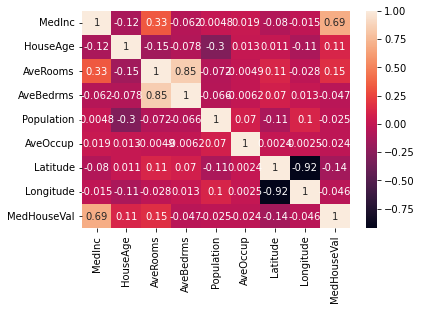

In [24]:
sns.heatmap(df.corr(), annot=True)


On peut voir que le paramètre qui a le plus d'influence est Medinc qui correspond au salaire moyen. Les autres paramètres one une importance beaucoup moins importante sur le prix

Grâce a la longitude et la latitude, nous pouvons créer une carte qui nous permet de voir facilement l'evolution des prix des maisons en fonction de leur situation géographique

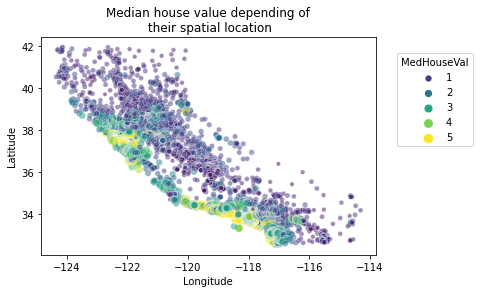

In [59]:
import seaborn as sns

sns.scatterplot(data=california_housing.frame, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="viridis", alpha=0.5)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
_ = plt.title("Prix moyen d'une maison en fonction de sa localisation")

Sur cette carte, nous pouvons finalement voir que la longitude et la latitude combiné ont une influence sur le prix de la maison alors que sur notre heatmap l'influcence de chacune paraissait plutot minime

Pour la suite nous prenons donc le paramètre le plus intéressant (revenu moyen) que nous mettrons dans la variable X et la valeur a prédire (prix moyen d'une maison) dans la variable y.

In [92]:
X = df[["MedInc"]]
y = df[["MedHouseVal"]]

Nous allons diviser nos datas en 2 parties, une partie pour le training et une partie pour faire les tests

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)

Maintenant nous allons calculer la régression linéaire pour pouvoir prédire le prix

In [94]:
lreg = LinearRegression()
lr = lreg.fit(X_train, y_train)

Nous pouvons afficher la qualité de notre prédiction qui sera un pourcentage de "bonne réponse"

In [96]:
print("Accuracy Score:", lr.score(X_test, y_test)*100)

Accuracy Score: 46.521717898355874


Nous avons un score de 46% de "bonne réponse", nous pouvons afficher sous forme d'un graphique notre résultat:
Le graphique représente la valeur moyenne d'une maison en fonction des revenus moyens. La prédiction de la valeur moyene d'une maison est trouvé en prenant la valeur des revenus moyens et en traçant une ligne droite jusqu'a la courbe. L'endroit ou les deux se croisent nous donne en ordonnée la valeur moyenne d'une maison.

C:\Users\utilisateur\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MedInc', ylabel='MedHouseVal'>

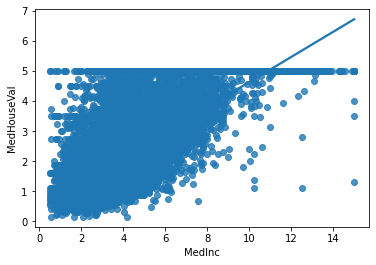

In [104]:
sns.regplot(X, y, ci=None)

Pour aller plus loin et pour plus de précision sur la prédiction nous pouvons faire une régression linéaire multiple qui nous permettra de prendre en compte toutes nos données

In [109]:
X = df.drop(columns= ["MedHouseVal"])
y = df[["MedHouseVal"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
lreg = LinearRegression()
lr = lreg.fit(X_train, y_train)
print("Accuracy Score:", lr.score(X_test, y_test)*100)

Accuracy Score: 59.825355014468684


En prenant toutes nos datas en paramètre, nous avons gagné 15% de précision sur notre modèle et avons maintenant une précision de presque 60%